In [332]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from scipy.optimize import Bounds

In [365]:
tickers = ["ETH-USD","BTC-USD", "MATIC-USD", "USDT-USD"]

In [454]:
df = yf.download(tickers, start="2019-01-01")["Adj Close"]

[*********************100%***********************]  4 of 4 completed


In [455]:
ret_df = np.log(df/df.shift(1))

<AxesSubplot:xlabel='Date'>

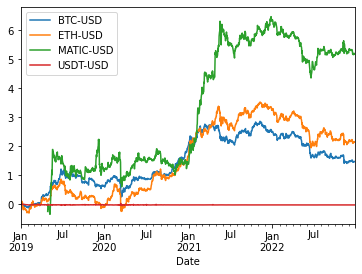

In [456]:
ret_df.cumsum().plot()

In [457]:
W = np.ones(len(ret_df.columns))/ np.ones(len(ret_df.columns)).sum()

In [458]:
W

array([0.25, 0.25, 0.25, 0.25])

In [459]:
def sharpe_pf(W, returns):
    pf_risk = W.dot(returns.cov()).dot(W)**0.5
    SR = W.dot(returns.mean()) / pf_risk
    return -SR

In [460]:
sharpe_pf(W, ret_df)

-0.04184486032312596

In [461]:
cons = ({"type":"eq", "fun": lambda x: np.sum(x)-1})

In [462]:
res = minimize(sharpe_pf, W,ret_df, bounds = Bounds(0,1), constraints = cons)

In [463]:
res

     fun: -0.04571718767646101
     jac: array([ 2.88679264e-04, -2.73306388e-04, -2.14152969e-05,  3.25050205e-05])
 message: 'Optimization terminated successfully'
    nfev: 40
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([0.0407342 , 0.02297828, 0.66603434, 0.27025318])

In [464]:
opt_W = res["x"]

In [465]:
opt_W

array([0.0407342 , 0.02297828, 0.66603434, 0.27025318])

In [466]:
ret_df.dot(opt_W).cumsum()

Date
2019-01-01         NaN
2019-01-02         NaN
2019-01-03         NaN
2019-01-04         NaN
2019-01-05         NaN
                ...   
2022-12-24    3.554842
2022-12-25    3.554052
2022-12-26    3.569629
2022-12-27    3.562669
2022-12-28    3.543494
Freq: D, Length: 1458, dtype: float64

In [467]:
ret_df.dot(W).cumsum()

Date
2019-01-01         NaN
2019-01-02         NaN
2019-01-03         NaN
2019-01-04         NaN
2019-01-05         NaN
                ...   
2022-12-24    2.102026
2022-12-25    2.101210
2022-12-26    2.109728
2022-12-27    2.101460
2022-12-28    2.090062
Freq: D, Length: 1458, dtype: float64

In [468]:
#sharpes = []

#for w in np.arange(0,1,0.01):
    #weights = w, 1-w
    #weights = np.array(weights)
    #print(weights)
    #sharpes.append(sharpe_pf(weights, ret_df))

In [469]:
#pd.Series(sharpes).plot()

In [470]:
#pd.Series(sharpes).nsmallest(1)

In [471]:
train = ret_df[:int(len(ret_df) * 0.7)]

In [472]:
test = ret_df[int(len(ret_df) * 0.7):]

In [473]:
res_train = minimize(sharpe_pf, W, train, bounds=Bounds(0,1), constraints = cons)

In [474]:
res_train

     fun: -0.07907471888714374
     jac: array([ 0.00014519,  0.00018336, -0.00017704, -0.00013113])
 message: 'Optimization terminated successfully'
    nfev: 40
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([0.49187104, 0.01733148, 0.22288543, 0.26791205])

In [475]:
test.dot(res_train["x"]).cumsum()

Date
2021-10-17   -0.002010
2021-10-18    0.004662
2021-10-19    0.021603
2021-10-20    0.044730
2021-10-21    0.011264
                ...   
2022-12-24   -0.793961
2022-12-25   -0.794415
2022-12-26   -0.786925
2022-12-27   -0.795154
2022-12-28   -0.803102
Freq: D, Length: 438, dtype: float64

In [476]:
test.dot(W).cumsum()

Date
2021-10-17   -0.004521
2021-10-18   -0.005303
2021-10-19    0.010804
2021-10-20    0.044718
2021-10-21    0.019275
                ...   
2022-12-24   -0.766454
2022-12-25   -0.767271
2022-12-26   -0.758753
2022-12-27   -0.767021
2022-12-28   -0.778418
Freq: D, Length: 438, dtype: float64

In [477]:
sharpe_pf(res_train["x"], test)

0.06299305368169153

In [478]:
sharpe_pf(W, test)

0.05413445339626278